# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [7]:
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_archive.duplicated().sum()

0

In [13]:
df_archive.tweet_id.duplicated().sum()

0

In [14]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_prediction.duplicated().sum()

0

In [25]:
image_prediction.tweet_id.duplicated().sum()

0

In [26]:
image_prediction.jpg_url.duplicated().sum()

66

In [27]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [28]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
chow                               20
Samoyed                            20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [29]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [30]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [31]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [32]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [33]:
tweet_json.duplicated().sum()

0

### Quality issues
1. The datatype for timestamp is not correct. Must be changed from string to datetime (df_archive)

2. There are too many duplicates in the jpg_url column in the table (image_prediction)

3. There are far too many entries in the table that do not fit into (image_prediction)

4. Create a breed column and choose the best prediction for the image

5. Some columns have the wrong datatype and are therefore not visualized. Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id (df_archive)

6. The table should only have the tweets, the other information are not relevant (df_archive)

7. Tweet_ID datatype in the df_archive dataframe is wrong

8. Tweet_ID, Retweet_count and Favorite_count datatype in the tweet_json dataframe is wrong

9. Tweet_ID datatype in the image_prediction dataframe is wrong

### Tidiness issues
1. I want to make all three tables into one table

2. The dog breeds can be summarized in one column in the table (df_archive)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
clean_df_archive = df_archive.copy()
clean_image_prediction = image_prediction.copy() 
clean_tweet_json = tweet_json.copy()

### Issue #1: The datatype for timestamp is not correct. Must be changed from string to datetime (df_archive)

#### Define:

I use the code 'pd.to_datetime ' to change the datatype. String -> Datetime

#### Code:

In [35]:
clean_df_archive.timestamp = clean_df_archive.timestamp.str[:-6]

clean_df_archive.timestamp = pd.to_datetime(clean_df_archive.timestamp)

#### Test:

In [36]:
clean_df_archive.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [37]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2: There are too many duplicates in the jpg_url column in the table (image_prediction)

#### Define

I will remove the duplicates in the jpg_url column

#### Code

In [38]:
clean_image_prediction.jpg_url.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055     True
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [39]:
clean_image_prediction.jpg_url.duplicated().sum()

66

In [40]:
clean_image_prediction.drop_duplicates(subset = 'jpg_url', inplace=True)

#### Test

In [41]:
clean_image_prediction.jpg_url.duplicated().sum()

0

### Issue #3: There are far too many entries in the table that do not fit into (image_prediction)

### Define:

I will drop the rows with tweet_id which are not dogs 

### Code:

In [42]:
print(clean_image_prediction.shape)
print(clean_df_archive.shape)
print(clean_tweet_json.shape)

(2009, 12)
(2356, 17)
(2354, 3)


In [43]:
clean_image_prediction.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = clean_image_prediction.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

clean_image_prediction = clean_image_prediction[~clean_image_prediction.tweet_id.isin(drop_list)]
clean_df_archive = clean_df_archive[~clean_df_archive.tweet_id.isin(drop_list)]
clean_tweet_json = clean_tweet_json[~clean_tweet_json.tweet_id.isin(drop_list)]

### Test:

In [44]:
print(clean_image_prediction.shape)
print(clean_df_archive.shape)
print(clean_tweet_json.shape)

(1691, 12)
(2038, 17)
(2037, 3)


In [45]:
clean_image_prediction.p1.value_counts()

golden_retriever               139
Labrador_retriever              95
Pembroke                        88
Chihuahua                       79
pug                             55
chow                            41
Samoyed                         40
Pomeranian                      38
toy_poodle                      38
malamute                        29
cocker_spaniel                  27
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              22
German_shepherd                 20
seat_belt                       20
Siberian_husky                  20
Staffordshire_bullterrier       19
Shetland_sheepdog               18
Maltese_dog                     18
Eskimo_dog                      18
Rottweiler                      17
Cardigan                        17
Shih-Tzu                        17
beagle                          17
kuvasz                          16
Lakeland_terrier                16
Italian_greyhound               16
Great_Pyrenees      

### Issue #4: Create a breed column and choose the best prediction for the image

In [46]:
breed = []
confident_level = [] 

In [47]:
def image_prediction(clean_image_prediction) :
    if clean_image_prediction.p1_dog == True:
        breed.append(clean_image_prediction.p1)
        confident_level.append(clean_image_prediction.p1_conf)
    elif clean_image_prediction.p2_dog == True:
        breed.append(clean_image_prediction.p2)
        confident_level.append(clean_image_prediction.p2_conf)
    elif clean_image_prediction.p3_dog == True:
        breed.append(clean_image_prediction.p3)
        confident_level.append(clean_image_prediction.p3_conf)
    else:
        breed.append('Unknown_breed')
        confident_level.append(0)

In [48]:
clean_image_prediction.apply(image_prediction, axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
19      None
20      None
22      None
23      None
24      None
26      None
27      None
28      None
30      None
31      None
32      None
33      None
34      None
35      None
        ... 
2040    None
2042    None
2043    None
2044    None
2045    None
2047    None
2048    None
2049    None
2050    None
2051    None
2053    None
2054    None
2056    None
2057    None
2058    None
2059    None
2060    None
2061    None
2062    None
2063    None
2064    None
2065    None
2066    None
2067    None
2068    None
2069    None
2070    None
2071    None
2072    None
2073    None
Length: 1691, dtype: object

In [49]:
clean_image_prediction['breed'] = breed
clean_image_prediction['confident_level'] = confident_level

In [50]:
clean_image_prediction = clean_image_prediction.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

In [51]:
clean_image_prediction.head()

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #5: Some columns have the wrong datatype and are therefore not visualized. Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id (df_archive)

### Define: 

Normally I wanted to change the datatype of the following columns 'in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id'. Namely from float to strings. Since I will remove these columns for the 6th point one way because I don't think they are relevant, I'll leave it like that.

### Issue #6: The table should only have the tweets, the other information are not relevant (df_archive)

### Define:

I will drop the columns with the code .drop([])

### Code:

In [52]:
clean_df_archive = clean_df_archive.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

### Test:

In [53]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2355
Data columns (total 12 columns):
tweet_id              2038 non-null int64
timestamp             2038 non-null datetime64[ns]
source                2038 non-null object
text                  2038 non-null object
expanded_urls         1979 non-null object
rating_numerator      2038 non-null int64
rating_denominator    2038 non-null int64
name                  2038 non-null object
doggo                 2038 non-null object
floofer               2038 non-null object
pupper                2038 non-null object
puppo                 2038 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 207.0+ KB


### Issue #7: Tweet_ID datatype in the df_archive dataframe is wrong

### Define:

Integer --> String

### Code:

In [54]:
clean_df_archive.tweet_id = clean_df_archive.tweet_id.astype(str)

### Test:

In [55]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 2355
Data columns (total 12 columns):
tweet_id              2038 non-null object
timestamp             2038 non-null datetime64[ns]
source                2038 non-null object
text                  2038 non-null object
expanded_urls         1979 non-null object
rating_numerator      2038 non-null int64
rating_denominator    2038 non-null int64
name                  2038 non-null object
doggo                 2038 non-null object
floofer               2038 non-null object
pupper                2038 non-null object
puppo                 2038 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 207.0+ KB


### Issue #8: Tweet_ID, Retweet_count and Favorite_count datatype in the tweet_json dataframe is wrong

In [56]:
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 1 to 2353
Data columns (total 3 columns):
tweet_id          2037 non-null int64
retweet_count     2037 non-null int64
favorite_count    2037 non-null int64
dtypes: int64(3)
memory usage: 63.7 KB


In [57]:
clean_tweet_json.tweet_id = clean_tweet_json.tweet_id.astype(str)

In [58]:
clean_tweet_json.retweet_count = clean_tweet_json.retweet_count.astype(str)

In [59]:
clean_tweet_json.favorite_count = clean_tweet_json.favorite_count.astype(str)

In [60]:
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 1 to 2353
Data columns (total 3 columns):
tweet_id          2037 non-null object
retweet_count     2037 non-null object
favorite_count    2037 non-null object
dtypes: object(3)
memory usage: 63.7+ KB


### Issue #9: Tweet_ID datatype in the image_prediction dataframe is wrong

In [61]:
clean_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
breed              1691 non-null object
confident_level    1691 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 66.1+ KB


In [62]:
clean_image_prediction.tweet_id = clean_image_prediction.tweet_id.astype(str)

### Tidiness: 

### 1: The dog breeds can be summarized in one column in the table (df_archive)

In [63]:
clean_df_archive = pd.melt(clean_df_archive, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

In [64]:
clean_df_archive.drop('type', 1, inplace = True)

In [65]:
clean_df_archive = clean_df_archive.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [66]:
clean_df_archive.dog_stage.value_counts()

None       1707
pupper      218
doggo        74
puppo        29
floofer      10
Name: dog_stage, dtype: int64

### 2: I want to merge all dataframes

In [67]:
clean_df_archive = pd.merge(clean_df_archive, clean_tweet_json, on = ['tweet_id'], how = 'left')

In [68]:
clean_df_archive = pd.merge(clean_df_archive, clean_image_prediction, on = ['tweet_id'], how = 'left')

In [69]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2037
Data columns (total 14 columns):
tweet_id              2038 non-null object
timestamp             2038 non-null datetime64[ns]
source                2038 non-null object
text                  2038 non-null object
expanded_urls         1979 non-null object
rating_numerator      2038 non-null int64
rating_denominator    2038 non-null int64
name                  2038 non-null object
dog_stage             2038 non-null object
retweet_count         2037 non-null object
favorite_count        2037 non-null object
jpg_url               1691 non-null object
breed                 1691 non-null object
confident_level       1691 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 238.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
clean_df_archive.to_csv('twitter_archive_master.csv')

In [71]:
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confident_level
0,0,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,1198.0,1798.0,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,Chesapeake_Bay_retriever,0.088122
1,1,667530908589760512,2015-11-20 02:32:25,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,None,264.0,501.0,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.633037
2,2,667534815156183040,2015-11-20 02:47:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,576.0,866.0,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,Pembroke,0.435254
3,3,667538891197542400,2015-11-20 03:04:08,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,72.0,220.0,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier,0.618957
4,4,667544320556335104,2015-11-20 03:25:43,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,568.0,917.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893


### 1 insight - Which race appears the most in the dataframe?

In [73]:
df.breed.value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
Staffordshire_bullterrier          21
German_shepherd                    21
beagle                             20
Siberian_husky                     20
Shih-Tzu                           20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
kuvasz                             19
Lakeland_terrier                   18
Italian_grey

In [74]:
df.breed.describe()

count                 1691
unique                 113
top       golden_retriever
freq                   158
Name: breed, dtype: object

### Visualization

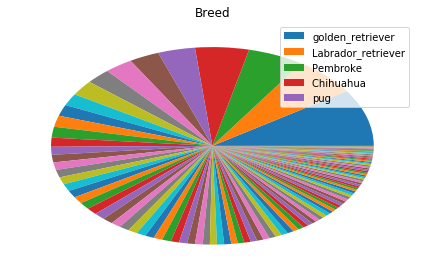

In [75]:
import matplotlib.pyplot as plt
values = df.breed.value_counts(normalize=True)
labels = ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua ', 'pug']

plt.pie(values)
plt.title('Breed')
plt.legend(labels, loc=0)
plt.tight_layout()

### 2 insight - Which source is used the most?

In [76]:
df.source.describe()

count                                                  2038
unique                                                    4
top       <a href="http://twitter.com/download/iphone" r...
freq                                                   1912
Name: source, dtype: object

### 3 insight - Which different stages of the dog are most common in the dataframe?

In [77]:
df.dog_stage.value_counts()

None       1707
pupper      218
doggo        74
puppo        29
floofer      10
Name: dog_stage, dtype: int64

In [78]:
df.dog_stage.describe()

count     2038
unique       5
top       None
freq      1707
Name: dog_stage, dtype: object

### Visualization

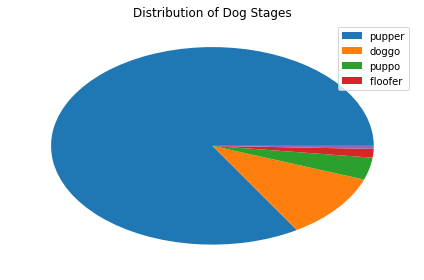

In [79]:
import matplotlib.pyplot as plt
values = df.dog_stage.value_counts(normalize=True)
labels = ['pupper', 'doggo', 'puppo', 'floofer ']

plt.pie(values)
plt.title('Distribution of Dog Stages')
plt.legend(labels, loc=0)
plt.tight_layout()

### Insights:
1. The most race which appears in the dataframe is the golden retriever.

2. The most used source is Twitter on IPhone.

3. The most common stage of the dog in the dataframe is 'None'.